In [2]:
# packages
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

### Our signal

In [3]:
# signal
sample_rate = 200
nsamples = 400
freq_camp = sample_rate/nsamples

t = np.arange(nsamples) / sample_rate

ys1 = 0.7*np.cos(2*np.pi*10*t)             # 10/400 = 0.025
ys2 = np.sin(2*np.pi*60*t)                 # 60/400 = 0.15 > 0.1
y = ys1 + ys2

# taps
numtaps = 6
f = 0.03                                   #cut-off freq
taps = signal.firwin(numtaps, f)

print('coeff = ', taps)

coeff =  [0.02856076 0.14288273 0.32855651 0.32855651 0.14288273 0.02856076]


### Taps

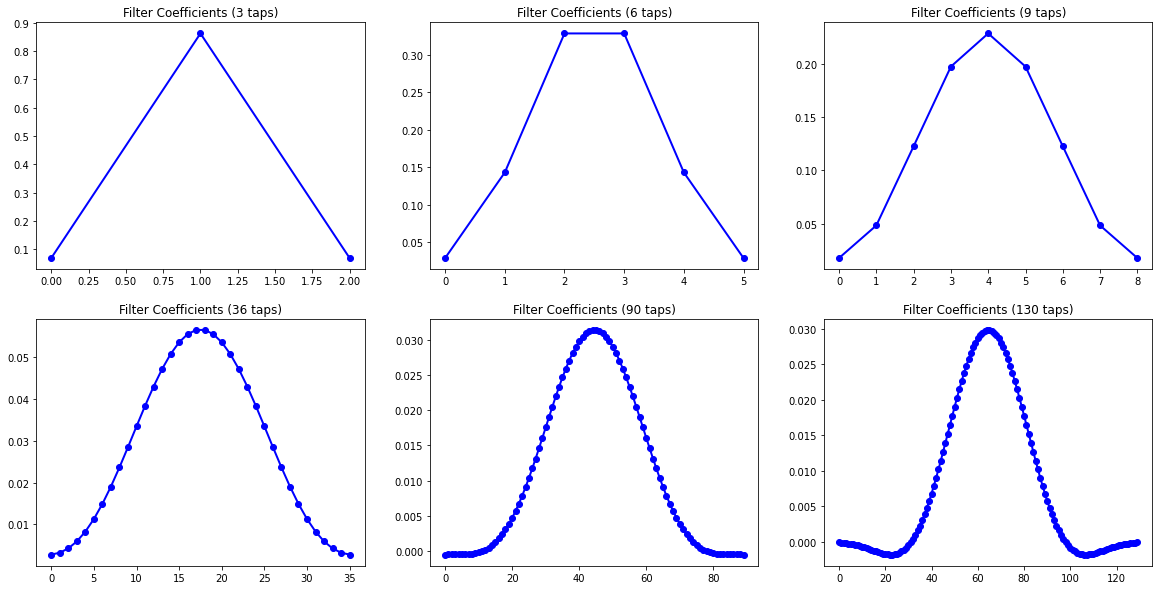

In [4]:
# FIR filter coefficients - changing nr. of taps
nT = [3,6,9,36,90,130]
f = 0.03

T = []
for i in nT:
    taps = signal.firwin(i, f)
    T.append(taps)

# plots 
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))

ax1.plot(T[0], 'bo-', linewidth=2)
ax1.set_title('Filter Coefficients (3 taps)')
ax2.plot(T[1], 'bo-', linewidth=2)
ax2.set_title('Filter Coefficients (6 taps)')
ax3.plot(T[2], 'bo-', linewidth=2)
ax3.set_title('Filter Coefficients (9 taps)')
ax4.plot(T[3], 'bo-', linewidth=2)
ax4.set_title('Filter Coefficients (36 taps)')
ax5.plot(T[4], 'bo-', linewidth=2)
ax5.set_title('Filter Coefficients (90 taps)')
ax6.plot(T[5], 'bo-', linewidth=2)
ax6.set_title('Filter Coefficients (130 taps)')

plt.show()
    

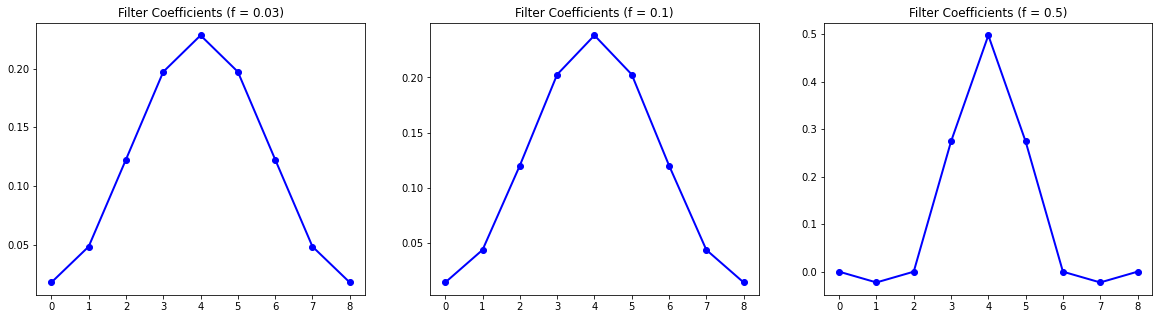

In [5]:
# FIR filter coefficients - changing cut-off freq
nT = 9
f = [0.03, 0.1, 0.5]

T = []
for i in f:
    taps = signal.firwin(nT, i)
    T.append(taps)

# plots
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))

ax1.plot(T[0], 'bo-', linewidth=2)
ax1.set_title('Filter Coefficients (f = 0.03)')
ax2.plot(T[1], 'bo-', linewidth=2)
ax2.set_title('Filter Coefficients (f = 0.1)')
ax3.plot(T[2], 'bo-', linewidth=2)
ax3.set_title('Filter Coefficients (f = 0.5)')


plt.show()

### Freq response

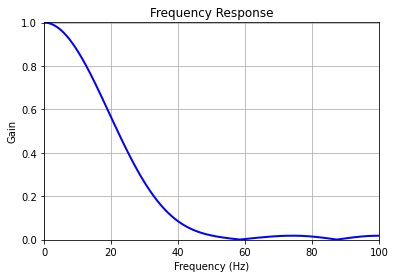

In [26]:
# Plot the magnitude response of the filter - our case
numtaps = 9
f = 0.03                                   #cut-off freq
taps = signal.firwin(numtaps, f)

sample_rate = 200
nyq_rate = sample_rate / 2
w, h = signal.freqz(taps, worN=8000)

# plot
plt.plot((w/np.pi)*nyq_rate, np.absolute(h), 'b',linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Frequency Response')
plt.xlim(-0.01,100)
plt.ylim(-0.001,1.001)
plt.grid()
plt.show()

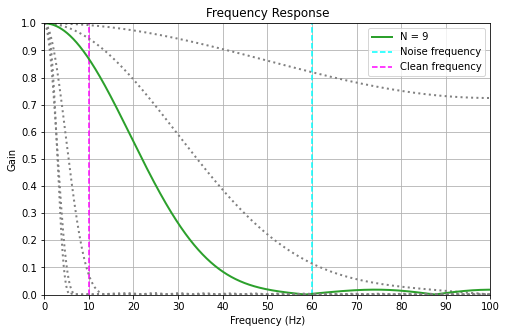

In [30]:
# Plot the magnitude response of the filter - changing nr. of taps
sample_rate = 200
nyq_rate = sample_rate / 2

nT = [3,6,9,36,90,130]   #9 and 12
f = 0.03

for i in nT:
    taps = signal.firwin(i, f)
    w, h = signal.freqz(taps, worN=8000)
    
    plt.plot((w/np.pi)*nyq_rate, np.absolute(h),linewidth=2, label='N = %d'%i)
    
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Frequency Response')
plt.xlim(-0.01,100)
plt.ylim(-0.001,1.001)
plt.legend()
plt.grid()
plt.show()

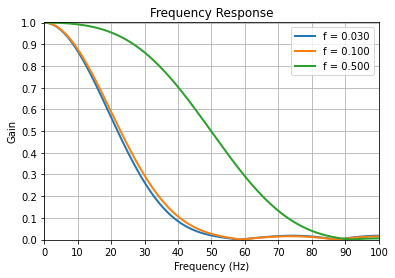

In [12]:
# Plot the magnitude response of the filter - changing cut-off freq
nT = 9
f = [0.03, 0.1, 0.5]

sample_rate = 200
nyq_rate = sample_rate / 2

for i in f:
    taps = signal.firwin(nT, i)
    w, h = signal.freqz(taps, worN=8000)
    
    plt.plot((w/np.pi)*nyq_rate, np.absolute(h),linewidth=2, label='f = %.3f'%i)
    
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Frequency Response')
plt.xticks(np.linspace(0, 100, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.xlim(-0.01,100)
plt.ylim(-0.001,1.001)
plt.legend()
plt.grid()
plt.show()